**Imports Setup**

In [1]:
# Data handling
import pandas as pd
import numpy as np

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Machine Learning tools
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Model saving
import joblib

# Settings for plots
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

print(" Libraries imported successfully")


 Libraries imported successfully


**Load Dataset**

In [5]:
# Load the Dataset
dataset = pd.read_csv(r"D:\Horizon Campus\Third Year\Second Semester\Intelligent System\Machine Learning\Wine Quality\data\WineQT.csv")
print(dataset.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  Id  
0      9.4        5   0  
1      9.8        5   1  
2      9

In [6]:
# Bacic Info
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB
None


In [7]:
# Summary Statistics
print(dataset.describe())

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1143.000000       1143.000000  1143.000000     1143.000000   
mean        8.311111          0.531339     0.268364        2.532152   
std         1.747595          0.179633     0.196686        1.355917   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.392500     0.090000        1.900000   
50%         7.900000          0.520000     0.250000        2.200000   
75%         9.100000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1143.000000          1143.000000           1143.000000  1143.000000   
mean      0.086933            15.615486             45.914698     0.996730   
std       0.047267            10.250486             32.782130     0.001925   
min       0.012000             1.000000         

In [8]:
# Check Missing Values
print(dataset.isnull().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64


**EDA & Create Target Variables**

In [9]:
# create a binary target Column
dataset['good'] = (dataset['quality'] >= 7).astype(int) # Good (1) if quality >=, else Bad (0)

In [10]:
# Show Class Distribution
print(dataset['good'].value_counts()) #(0 = Bad, 1 = Good)

good
0    984
1    159
Name: count, dtype: int64


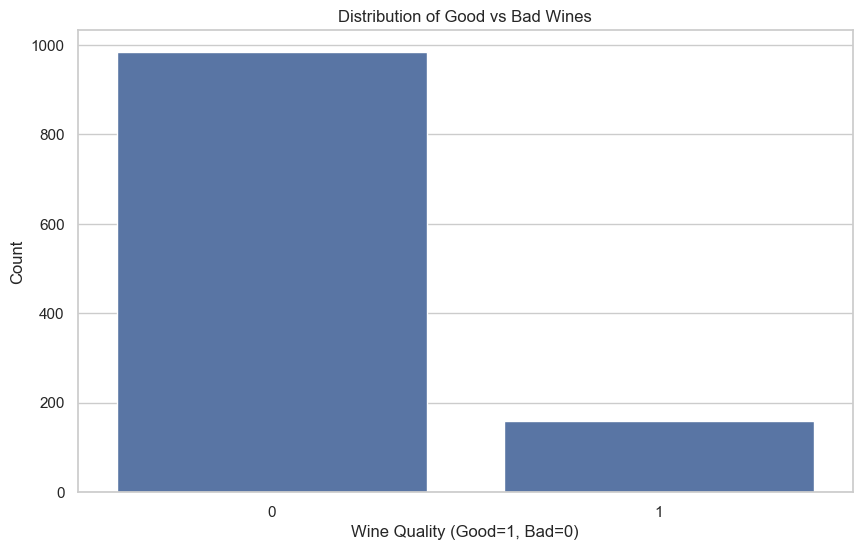

In [11]:
# Plot class distribution
sns.countplot(x='good', data=dataset)
plt.title("Distribution of Good vs Bad Wines")
plt.xlabel("Wine Quality (Good=1, Bad=0)")
plt.ylabel("Count")
plt.show()

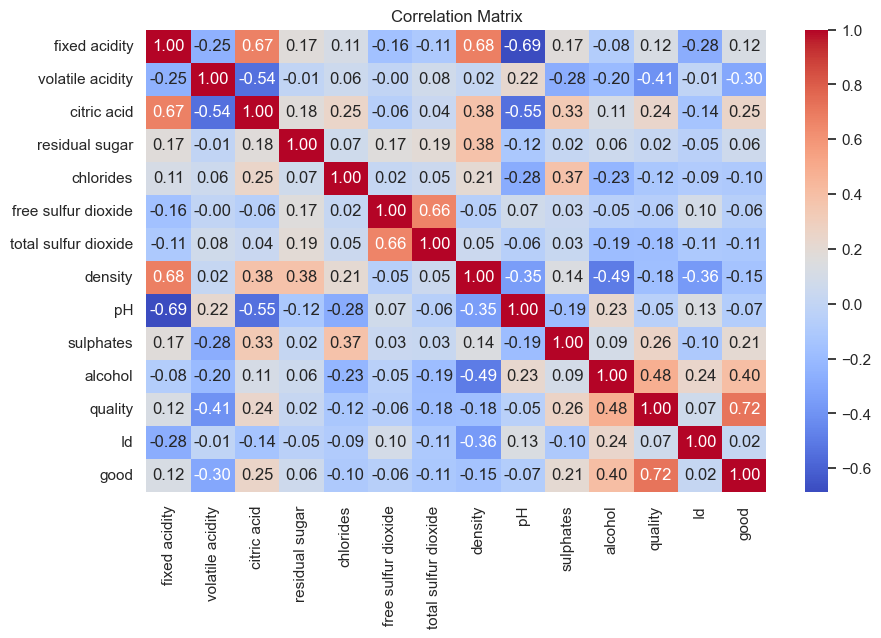

In [12]:
# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(dataset.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

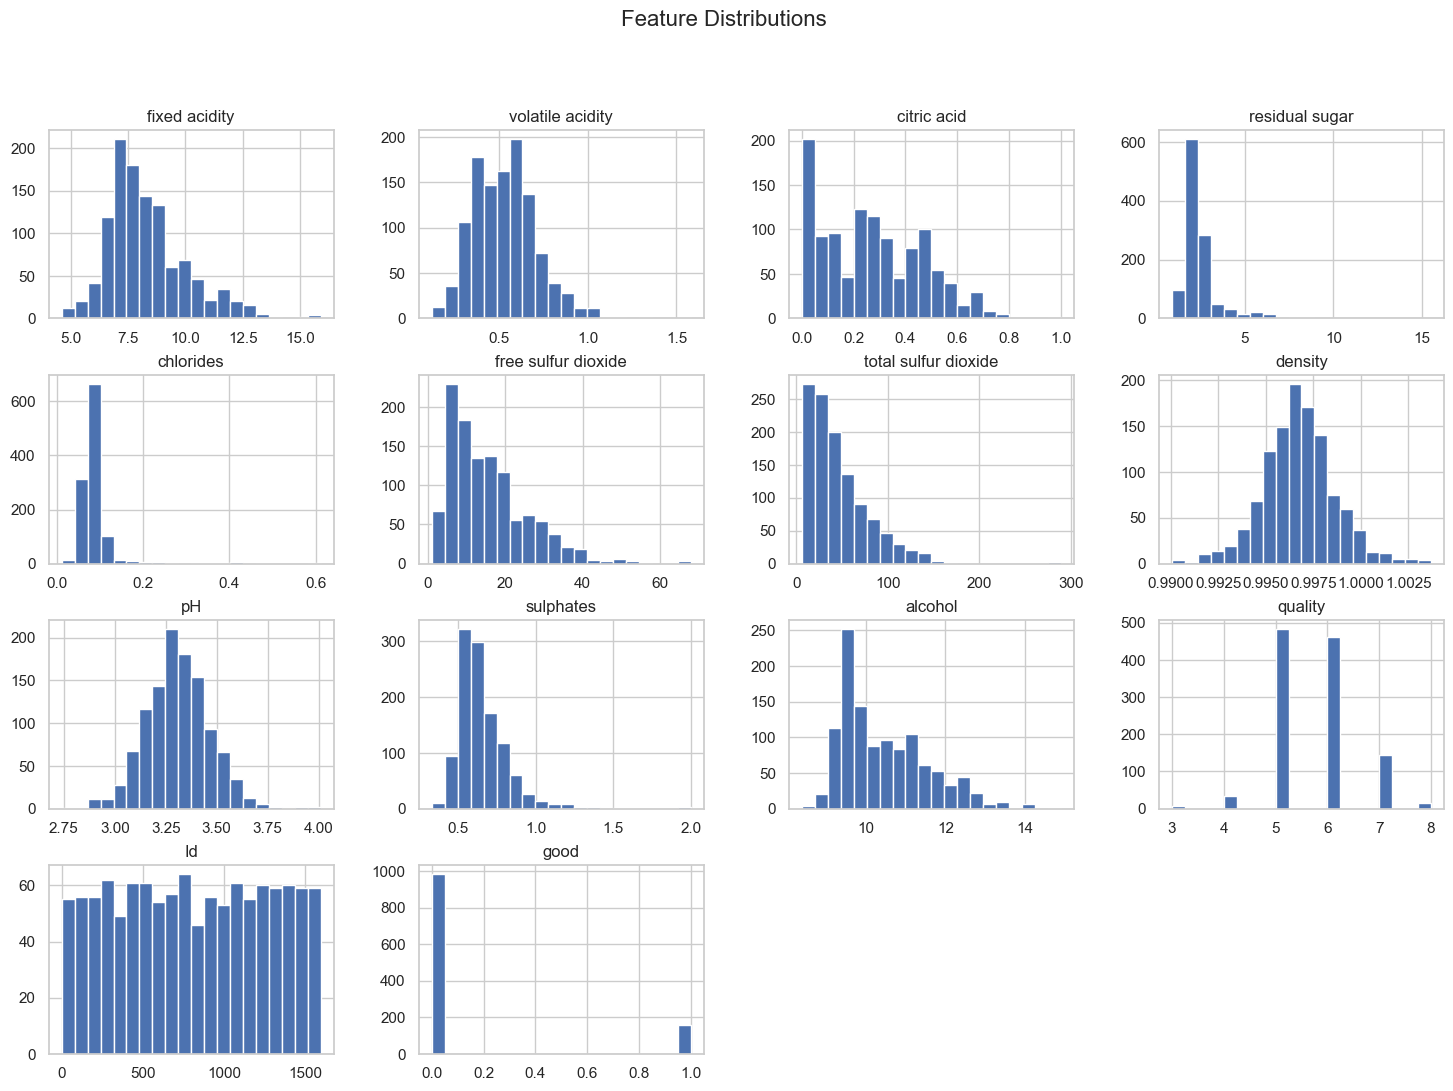

In [13]:
# Histograms of all features
dataset.hist(bins=20, figsize=(18, 12))
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()

**Splitting & PreProcessing**

In [14]:
#  Define features (X) and target (y)
X = dataset.drop(['quality', 'good'], axis=1)
y = dataset['good']

In [15]:
# Split into training and testing sets
#    Stratify=y keeps the class ratio the same in both sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")

Training set size: (914, 12)
Testing set size: (229, 12)


In [16]:
#  Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**Model Training**

Define Model to Compare

In [18]:
models = {
    "RandomForest": RandomForestClassifier(random_state=42),
    "LogisticRegression": LogisticRegression(max_iter=1000)
}

best_model = None
best_score = 0

Loop through models for CV + Training

In [20]:
for name, model in models.items():
    print(f"\n Training {name}...")

    # Cross-validation on training set
    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='accuracy')
    print(f"{name} CV Accuracy: {np.mean(cv_scores):.4f} ± {np.std(cv_scores):.4f}")

    # Fit model
    model.fit(X_train_scaled, y_train)

    # Predict on test set
    y_pred = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    print(f"{name} Test Accuracy: {acc:.4f}")
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))

    # Track best model by test accuracy
    if acc > best_score:
        best_score = acc
        best_model = model



 Training RandomForest...
RandomForest CV Accuracy: 0.8928 ± 0.0243
RandomForest Test Accuracy: 0.9214
Confusion Matrix:
 [[191   6]
 [ 12  20]]
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.97      0.95       197
           1       0.77      0.62      0.69        32

    accuracy                           0.92       229
   macro avg       0.86      0.80      0.82       229
weighted avg       0.92      0.92      0.92       229


 Training LogisticRegression...
LogisticRegression CV Accuracy: 0.8753 ± 0.0147
LogisticRegression Test Accuracy: 0.8690
Confusion Matrix:
 [[188   9]
 [ 21  11]]
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.95      0.93       197
           1       0.55      0.34      0.42        32

    accuracy                           0.87       229
   macro avg       0.72      0.65      0.67       229
weighted avg       0.85      0.87      0.86

Save the Best Model and scaler

In [21]:
joblib.dump(best_model, "model.pkl")
joblib.dump(scaler, "scaler.pkl")

print(f"\n Best model saved: {best_model}")
print(f" Scaler saved for preprocessing input data")


 Best model saved: RandomForestClassifier(random_state=42)
 Scaler saved for preprocessing input data


**Running and Verifying Output**

In [22]:
import os

# Check if model and scaler were saved
if os.path.exists("model.pkl") and os.path.exists("scaler.pkl"):
    print("\n Training complete! Model and scaler are saved.")
    print(" - model.pkl (trained best model)")
    print(" - scaler.pkl (feature scaler for preprocessing)")
else:
    print("\n Something went wrong: Model or scaler file missing.")

print("\nYou can now use these files in your Streamlit app for predictions.")


 Training complete! Model and scaler are saved.
 - model.pkl (trained best model)
 - scaler.pkl (feature scaler for preprocessing)

You can now use these files in your Streamlit app for predictions.
